In [1]:
# Name: Meghan OConnell
# Date: 6/16/2023
# Due Date: 6/18/2023
# Course: CS379-2303A-01 Machine Learning

In [2]:
# Description:
#  This is an unsupervised machine learning algorithm
#  that uses KMeans to predict survivors of the titanic

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the data set using Pandas
data = pd.read_excel(r"C:\Users\letha\Local Documents\Jupyter\CS379\Unit1\titanic_THIS.xls")

In [5]:
# Printing the first 3 rows of the data just so I can
#  see what I'm doing
data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


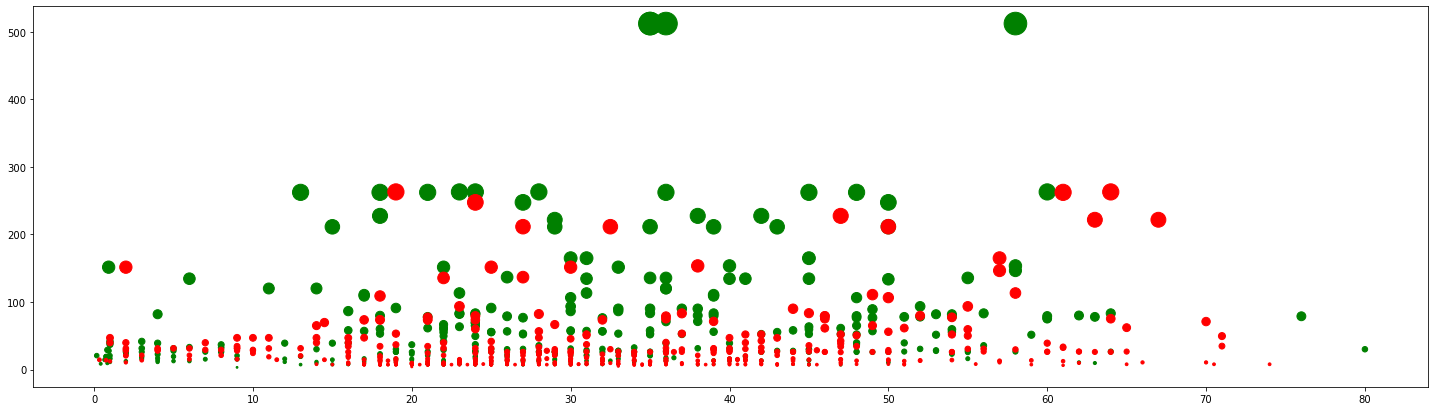

In [6]:
#Visualizing the data

plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(data[data['survived'] == 1]['age'],
           data[data['survived'] == 1]['fare'],
           c='green', s=data[data['survived'] == 1]
           ['fare'])
ax.scatter(data[data['survived'] == 0]['age'],
           data[data['survived'] == 0]['fare'],
           c='red', s=data[data['survived'] == 0]
           ['fare'])
           

In [7]:
# Checking data types in order to remove or convert
#    object data types to something more useful
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
#Drop unnecessary columns
data = data.drop(['boat', 'body', 'cabin', 
                    'embarked', 'home.dest',
                     'ticket', 'name'], axis=1)

In [9]:
#Checking for null rows
data.isnull().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
fare          1
dtype: int64

In [10]:
#Remove null rows
data = data.dropna(subset = ['age'])

data.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
dtype: object

In [11]:
# Filling the one null fare value with a median num
# This prevents a conversion issue later on

data['fare'] = data['fare'].fillna(data['fare'].median())

In [12]:
# Checking for other null values

data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [13]:
# Checking survival rate of the data
survived = data.groupby('survived').survived.count()
survived

survived
0    619
1    427
Name: survived, dtype: int64

In [14]:
# Checking survival rate of the data
percent_survived = (survived / len(data)) * 100
percent_survived

survived
0    59.17782
1    40.82218
Name: survived, dtype: float64

In [15]:
# Checking the sex of survivors
sex = data.groupby('sex').survived.count()
sex

sex
female    388
male      658
Name: survived, dtype: int64

In [16]:
# Checking percentage of survivors by sex
percent_sex = (sex / len(data)) * 100
percent_sex

sex
female    37.09369
male      62.90631
Name: survived, dtype: float64

In [17]:
# Checking survival rate by class
pclass = data.groupby('pclass').survived.count()
pclass

pclass
1    284
2    261
3    501
Name: survived, dtype: int64

In [18]:
#Checking survival rate by class, percentage
percent_class = (pclass /len(data)) * 100
percent_class

pclass
1    27.151052
2    24.952199
3    47.896750
Name: survived, dtype: float64

In [19]:
# Changing sex column from object to an int data type

sex1={'male':1, 'female':2}
data.sex = data.sex.map(sex1)

In [20]:
# Checking that the sex change was successful
print(data['sex'].unique())

[2 1]


In [21]:
#Converting from a floating data type to int
data.age = data.age.astype(int)
data.fare = data.fare.astype(int)

In [22]:
#Checking on the data visually
data.head(5)

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,2,29,0,0,211
1,1,1,1,0,1,2,151
2,1,0,2,2,1,2,151
3,1,0,1,30,1,2,151
4,1,0,2,25,1,2,151


In [23]:
# Creating x and y values for the algorithm
y = data["survived"]
features = ["pclass", "sex", "age", "fare"]
x = data[features]

In [24]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
x.shape

(1046, 4)

In [25]:
np.mean(x), np.std(x)

(5.4343612677636724e-17, 1.0)

In [26]:
feat_cols = ['feature' + str(i) for i in 
                 range(x.shape[1])]
feat_cols

['feature0', 'feature1', 'feature2', 'feature3']

In [27]:
normalised = pd.DataFrame(x,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3
0,-1.435579,1.302258,-0.059469,3.137888
1,-1.435579,-0.767897,-2.070554,2.060487
2,-1.435579,1.302258,-1.931859,2.060487
3,-1.435579,-0.767897,0.009878,2.060487
4,-1.435579,1.302258,-0.336860,2.060487
...,...,...,...,...
1041,0.942276,-0.767897,1.050095,-0.525276
1042,0.942276,1.302258,-1.099686,-0.399579
1043,0.942276,-0.767897,-0.267513,-0.525276
1044,0.942276,-0.767897,-0.198165,-0.525276


In [28]:
from sklearn.decomposition import PCA

pca_insurance = PCA(n_components=2)
principalComponents_insurance = pca_insurance.fit_transform(x)

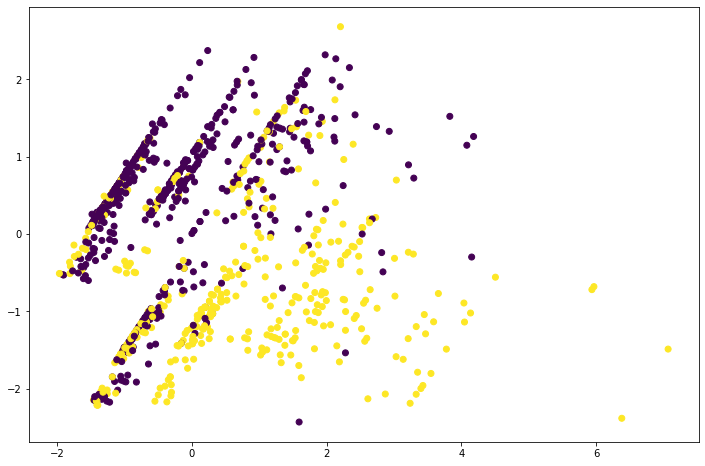

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(principalComponents_insurance[:, 0], principalComponents_insurance[:, 1], c = y, alpha = 1)

In [30]:
# Split the training file into training and testing

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split( x, y, 
            test_size=0.1, shuffle=True, random_state=1, 
            stratify=y)
x_train.shape, y_train.shape, x_val.shape, y_val.shape
     

((941, 4), (941,), (105, 4), (105,))

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(RandomForestClassifier(n_estimators=300, 
        random_state=1, class_weight='balanced')).fit(x_train, 
        y_train)
print(model.score(x_train, y_train))

0.9107332624867163


In [32]:
y_pred = model.predict(x_val)
print(model.score(x_val, y_val))

0.780952380952381


In [33]:
#Creating a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[54,  8],
       [15, 28]], dtype=int64)

In [35]:
#Viewing the prediction accuracy
df = pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
146,1,1
1066,0,0
368,0,0
192,1,1
142,0,0
...,...,...
608,0,0
857,1,0
733,1,0
291,1,1


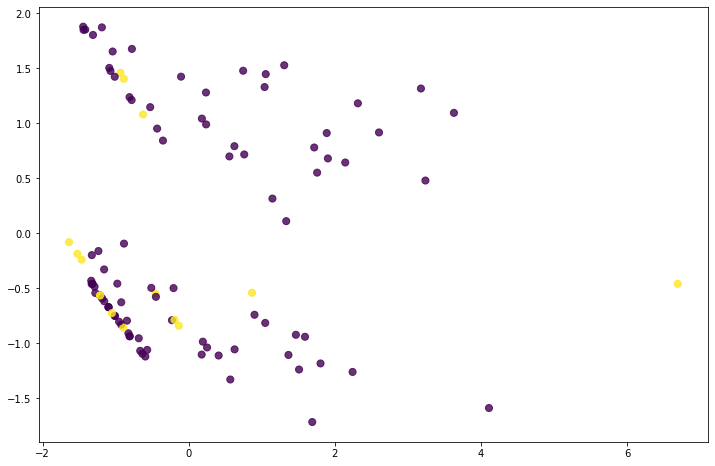

In [38]:
#Plotting the misses of the algorithm

pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(x_val)

plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], 
            principalComponents_val[:,1], c = y_pred == y_val - 1, 
            alpha = .8, s = 50)

In [39]:
#KMeans Clustering
#Normalise x
x = (x.max() - x) / (x.max() - x.min())

In [41]:
from sklearn.cluster import KMeans

kmeans = kmeans = KMeans(n_clusters=2, max_iter=500, 
            algorithm = 'auto',random_state=1)
kmeans.fit(x)

KMeans(max_iter=500, n_clusters=2, random_state=1)

In [43]:
correct = 0
prediction = kmeans.predict(x)

pred_df = pd.DataFrame({'actual': y, 'prediction': prediction})
print(pred_df)

      actual  prediction
0          1           0
1          1           0
2          0           0
3          0           0
4          0           0
...      ...         ...
1301       0           1
1304       0           1
1306       0           1
1307       0           1
1308       0           1

[1046 rows x 2 columns]


## References

Elam, D. (2023, June 13). Unit 1 Live Chat: Introduction [chat]. Retrieved from Colorado Technical University, Virtual Campus, APA Style Lab: https://campus.ctuonline.edu

Tracyrenee. (2021, July 22). Using KMeans clustering to predict survivors of the Titanic. Medium; MLearning.ai. https://medium.com/mlearning-ai/using-kmeans-clustering-to-predict-survivors-of-the-titanic-ae3d3e959eb8
‌
Randerson112358. (2019, July 22). Titanic Survival Prediction Using Machine Learning - Better Programming. Medium; Better Programming. https://betterprogramming.pub/titanic-survival-prediction-using-machine-learning-4c5ff1e3fa16

Reading an excel file using Python. (2018, April 23). GeeksforGeeks; GeeksforGeeks. https://www.geeksforgeeks.org/reading-excel-file-using-python/![image.png](attachment:image.png)